In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
data = load_boston()
X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["MEDV"])
df = pd.concat([X, y], axis=1)
df_train, df_test = train_test_split(df, test_size=0.1, random_state=1)

In [3]:
print(df_train.shape)
df_train.head()

(455, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
242,0.10290,30.0,4.93,0.0,0.428,6.358,52.9,7.0355,6.0,300.0,16.6,372.75,11.22,22.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
168,2.30040,0.0,19.58,0.0,0.605,6.319,96.1,2.1000,5.0,403.0,14.7,297.09,11.10,23.8
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,8.1
62,0.11027,25.0,5.13,0.0,0.453,6.456,67.8,7.2255,8.0,284.0,19.7,396.90,6.73,22.2


In [4]:
model_cart = DecisionTreeRegressor(criterion="mse", max_depth=3, min_samples_split=20)

In [5]:
model_cart.fit(df_train.drop("MEDV", axis=1), df_train["MEDV"])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [6]:
y_pred = model_cart.predict(df_test.drop("MEDV", axis=1))

In [7]:
mean_squared_error(y_pred, df_test["MEDV"])

15.301130071406954

In [8]:
model_rf = RandomForestRegressor(criterion="mse", 
                              max_depth=3, 
                              min_samples_split=20, 
                              n_estimators=10)
model_rf.fit(df_train.drop("MEDV", axis=1), df_train["MEDV"])
y_pred = model_rf.predict(df_test.drop("MEDV", axis=1))

In [9]:
mean_squared_error(y_pred, df_test["MEDV"])

8.631310034013367

In [17]:
model_rf.estimators_[1]

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=607685015, splitter='best')

## Plot Trees

In [11]:
from sklearn.tree import plot_tree

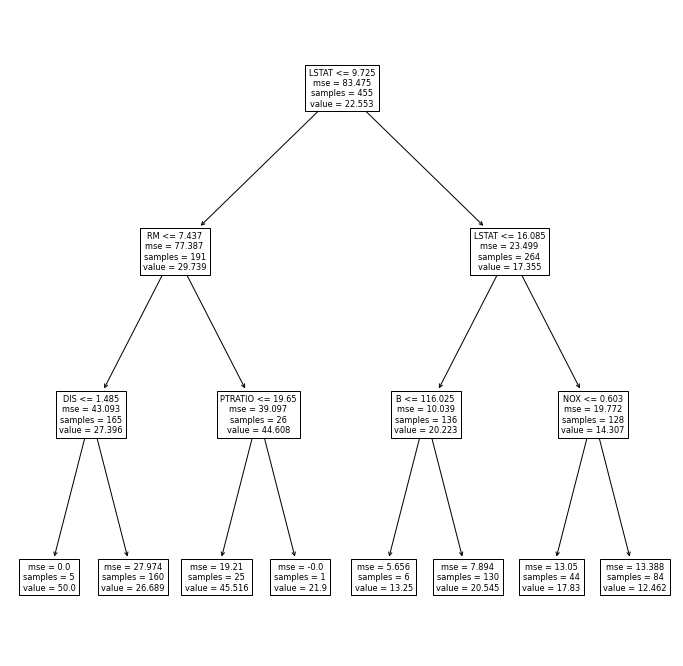

In [12]:
plt.figure(figsize=(12, 12))
plot_tree(model_cart, feature_names=df_train.columns[:-1])
plt.show()

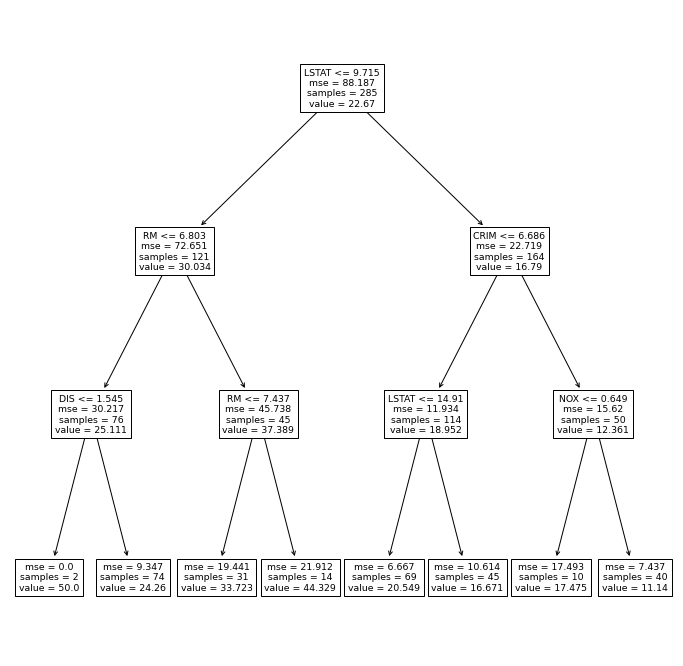

In [13]:
plt.figure(figsize=(12, 12))
plot_tree(model_rf.estimators_[0], feature_names=df_train.columns[:-1])
plt.show()